In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Activation

In [14]:
features = pd.read_csv('Dataset/gastrointestinal_colonoscopy_lesions_dataset.csv')
features = features.T
class_label = pd.Series(features.index)
features.index = range(features.shape[0])
classes = np.zeros((features.shape[0], 3))
for i in range(classes.shape[0]):
    if 'adenoma' in class_label[i]:
        classes[i,0] = 1.0
        class_label[i] = 0
    elif 'serrated' in class_label[i]:
        classes[i,2] = 1.0
        class_label[i] = 2
    else:
        classes[i,1] = 1.0
        class_label[i] = 1
classes = {'adenoma': classes[:,0], 'hyperplasic': classes[:,1], 'serrated': classes[:,2]}
classes = pd.DataFrame(classes)
class_label = class_label.astype('int')
# class1 = [float(i==1) for i in class_label.iloc[:,0]]
# class2 = [float(i==2) for i in class_label.iloc[:,0]]
# class_label = class_label.to_numpy().flatten()

In [9]:
features2 = pd.DataFrame({})
for col in features.columns:
    if features[col].abs().max()==0:
        continue
    features[col] = (features[col] - features[col].mean())/features[col].abs().max()
features.isnull().values.any()
#     if features2[col].isnull().values.any():
#         print(features[col].abs().max())
# features.index = range(features.shape[0])
# np.where(features.isnull())
# print(features.iloc[0,170])

False

In [10]:
model = Sequential([
    
    InputLayer(input_shape=(features.shape[1])),
    
    Dense(7, activation='sigmoid'),
    
    Dense(5, activation='sigmoid'),
    
    Dense(3, activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

In [11]:
model.fit(features, classes, epochs=500)

Epoch 1/500
5/5 [==============================] - 0s 6ms/step - loss: 0.6367 - accuracy: 0.5263
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 0.6314 - accuracy: 0.5263
Epoch 3/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6265 - accuracy: 0.5263
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6219 - accuracy: 0.5263
Epoch 5/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6177 - accuracy: 0.5263
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6137 - accuracy: 0.5263
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6101 - accuracy: 0.5263
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6067 - accuracy: 0.5263
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6036 - accuracy: 0.5263
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6009 - accuracy: 0.5263
Epoch 11/500
5/5 [===========

5/5 [==============================] - 0s 2ms/step - loss: 0.5197 - accuracy: 0.5263
Epoch 85/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5185 - accuracy: 0.5263
Epoch 86/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.5263
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5161 - accuracy: 0.5263
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5149 - accuracy: 0.5263
Epoch 89/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.5263
Epoch 90/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5124 - accuracy: 0.5263
Epoch 91/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5111 - accuracy: 0.5263
Epoch 92/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.5395
Epoch 93/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5086 - accuracy: 0.5658
Epoch 94/500
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.7895
Epoch 168/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4026 - accuracy: 0.7895
Epoch 169/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4014 - accuracy: 0.7895
Epoch 170/500
5/5 [==============================] - 0s 3ms/step - loss: 0.4001 - accuracy: 0.7895
Epoch 171/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3988 - accuracy: 0.7895
Epoch 172/500
5/5 [==============================] - 0s 3ms/step - loss: 0.3975 - accuracy: 0.7895
Epoch 173/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.7895
Epoch 174/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.7895
Epoch 175/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3938 - accuracy: 0.7895
Epoch 176/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3925 - accuracy: 0.7895
Epoch 177/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8026
Epoch 250/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3114 - accuracy: 0.8026
Epoch 251/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3104 - accuracy: 0.8026
Epoch 252/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3094 - accuracy: 0.8026
Epoch 253/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3084 - accuracy: 0.8026
Epoch 254/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3073 - accuracy: 0.8026
Epoch 255/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3063 - accuracy: 0.8026
Epoch 256/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8026
Epoch 257/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3044 - accuracy: 0.8092
Epoch 258/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3034 - accuracy: 0.8092
Epoch 259/500
5/5 [=====

5/5 [==============================] - 0s 3ms/step - loss: 0.2304 - accuracy: 0.9013
Epoch 332/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2294 - accuracy: 0.9079
Epoch 333/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2284 - accuracy: 0.9079
Epoch 334/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2274 - accuracy: 0.9079
Epoch 335/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2264 - accuracy: 0.9079
Epoch 336/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 0.9145
Epoch 337/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.9145
Epoch 338/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2233 - accuracy: 0.9145
Epoch 339/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2223 - accuracy: 0.9211
Epoch 340/500
5/5 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9211
Epoch 341/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.1540 - accuracy: 0.9868
Epoch 414/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1533 - accuracy: 0.9868
Epoch 415/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1525 - accuracy: 0.9868
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1517 - accuracy: 0.9868
Epoch 417/500
5/5 [==============================] - 0s 3ms/step - loss: 0.1510 - accuracy: 0.9868
Epoch 418/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1502 - accuracy: 0.9868
Epoch 419/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1495 - accuracy: 0.9868
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1487 - accuracy: 0.9868
Epoch 421/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1479 - accuracy: 0.9868
Epoch 422/500
5/5 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.9868
Epoch 423/500
5/5 [=====

5/5 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 1.0000
Epoch 496/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 1.0000
Epoch 497/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0971 - accuracy: 1.0000
Epoch 498/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0966 - accuracy: 1.0000
Epoch 499/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 1.0000
Epoch 500/500
5/5 [==============================] - 0s 2ms/step - loss: 0.0957 - accuracy: 1.0000


In [12]:
grad_sum = 0
for col_name in tqdm(features.columns):
    pointFrame = features.loc[:, features.columns != col_name]
    for i in features[col_name]:
        pointFrame[col_name] = i*np.ones(len(features.index))
        points = tf.Variable(pointFrame, dtype='float')
        with tf.GradientTape() as tape:
            pred = model(points, training=False)
        grads = tape.gradient(pred, points)
        grad_sum += grads.numpy()
saliency_order = np.argsort(sum(grad_sum))

100%|██████████| 700/700 [05:43<00:00,  2.04it/s]


In [36]:
num_features = 250
salient_features = features.iloc[:,saliency_order[0:num_features]]
A = np.zeros((features.shape[0], features.shape[0]))
for i in features.index:
    for j in range(i):
        A[i,j] = np.linalg.norm(salient_features.iloc[i,:] - salient_features.iloc[j,:])
A = A + np.transpose(A)
p = np.median(A).astype('int')
# p = 1.5
A = (A < p)
A = A - np.eye(A.shape[0])

[]

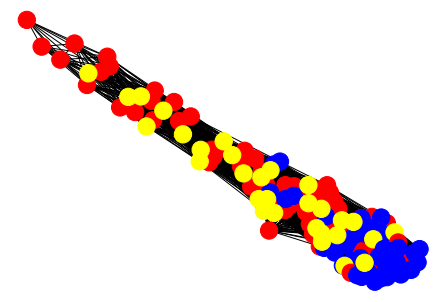

In [37]:
rows, cols = np.where(A==1)
edges = zip(rows.tolist(), cols.tolist())
G = nx.Graph()
G.add_edges_from(edges, node_size=1)
color_map = np.array([])
for node in G:
    if (class_label[node]==0):
        color_map = np.append(color_map, 'red')
    elif (class_label[node]==1):
        color_map = np.append(color_map, 'blue')
    else:
        color_map = np.append(color_map, 'yellow')
nx.draw(G, node_color=color_map)
plt.plot()